# 1. Import required packages

In [2]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.7.8


# 2. Load the labeled scRNA data

In [4]:
# load from here for saved raw h5ad
data_path=r'L:\Shiwei\DNA_MERFISH_analysis\SMARTer_nuclei_MOp'
adata = sc.read(os.path.join(data_path,r'MOp_smart_sn_labeled_20220707.h5ad'))
len(adata)

6171

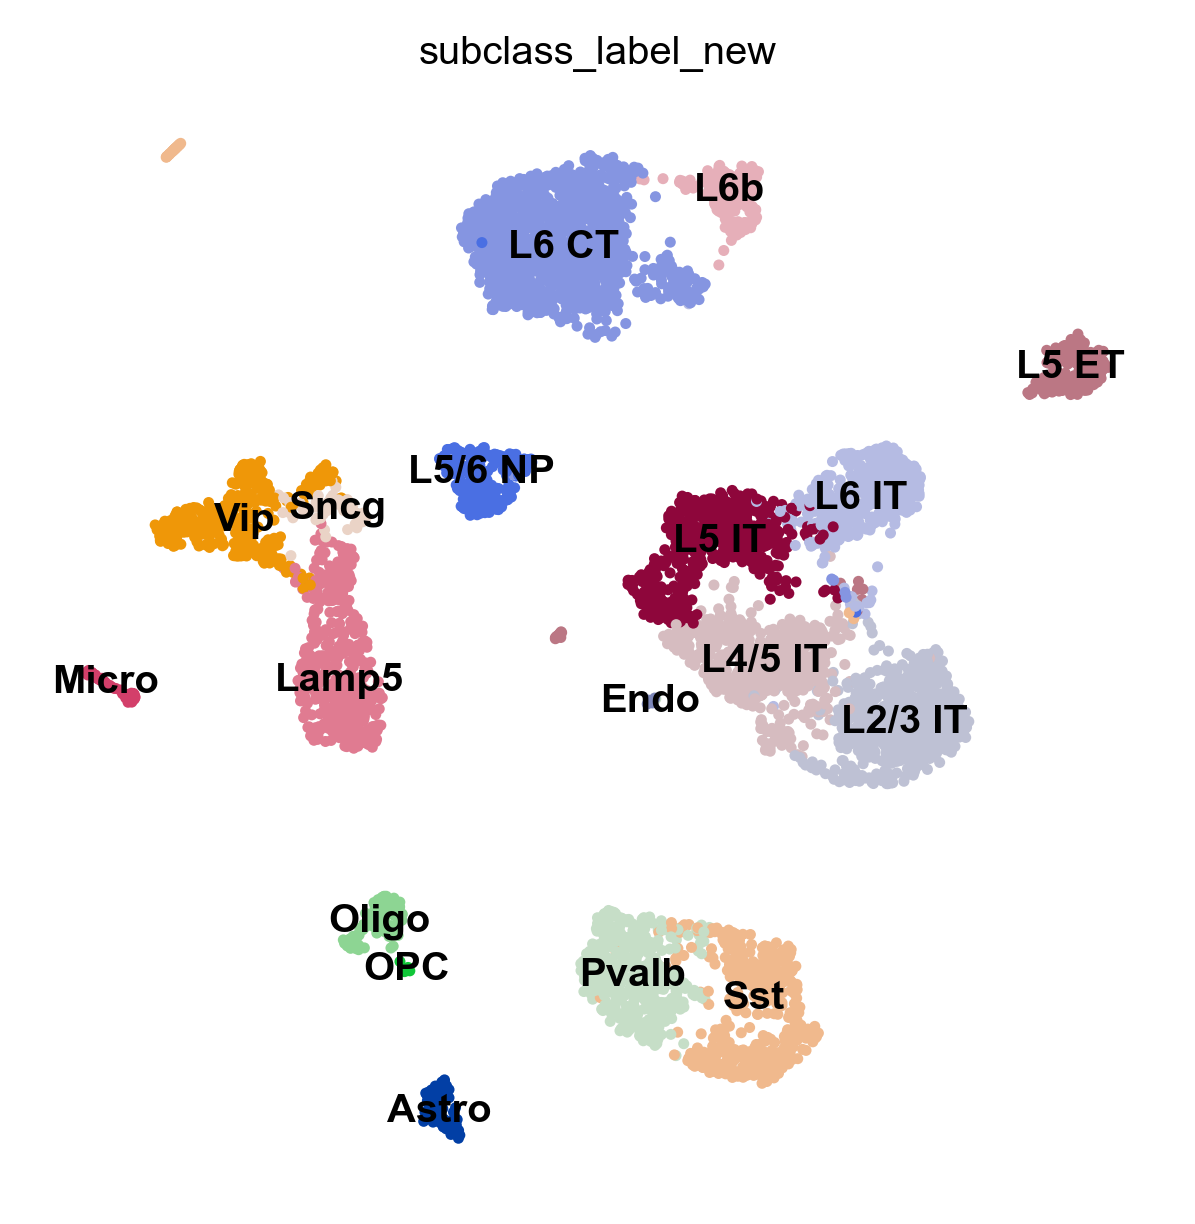

In [111]:
# Plot the UMAP
sc.pl.umap(adata, color='subclass_label_new', legend_loc='on data')

# 3. Find marker genes between subclasses

## 3.1 Find markers using transformed adata

In [17]:
# Perform marker gene analysis (using the class label direclty, independent of the UMAP visualization)

class_list = ['Gluta','Astro']
groupby_type='class_label_new'



#class_list = ['Neuronal','Non-Neuronal']
#groupby_type='neuron_identity'


both_way=True
add_control=False
test_method='wilcoxon'
#test_method='t-test'
#test_method='logreg'

if test_method=='wilcoxon':
    tie_correct=True
else:
    tie_correct=False

sel_gene_list_dict={}
use_raw=False
n_genes=100

class1=class_list[0]
class2=class_list[1]
sc.tl.rank_genes_groups(adata,groupby=groupby_type, groups=[class1],method=test_method,
                        reference=class2,  # or 'rest' as default
                        tie_correct=tie_correct,
                        use_raw=use_raw,
                         pts=True)

all_compared_gene_list=[]
all_compared_score_list=[]
for _gene, _score in zip(adata.uns['rank_genes_groups']['names'],adata.uns['rank_genes_groups']['scores']):
    all_compared_gene_list.append(_gene[0])
    all_compared_score_list.append(_score[0])
    
if both_way:
    # get the first 100 up-regulated genes
    sel_gene_list_dict['upregulated'] =all_compared_gene_list[:n_genes]
    #sel_gene_list_dict['upregulated'] =np.intersect1d(sel_gene_list_dict['upregulated'], linc_genes)
    # get the last 100 for down-regulated genes and sort them reversely
    down_gene_list = all_compared_gene_list[-n_genes:]
    down_gene_list.reverse()
    sel_gene_list_dict['downregulated'] =down_gene_list
    #sel_gene_list_dict['downregulated'] =np.intersect1d(sel_gene_list_dict['downregulated'], linc_genes)
        
if add_control:
    for _gene, _score in zip(all_compared_gene_list,all_compared_score_list):
        if abs(_score)==0:
            control_gene_list.append(_gene)
    control_size = np.min((300, len(control_gene_list)))
    print (f'{len(control_gene_list)} Control genes with z-score close to 0 added.')
    # pick 150 from above randomly
    print (f'Pick {control_size} control genes randomly from all candidates.')
    sel_gene_list_dict['control']= np.random.choice(control_gene_list,control_size)
    


_final_class_list = class_list

C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [18]:
# from 
adata.uns['rank_genes_groups']['pts']

Gluta  Astro
0610005C13Rik    1.0    1.0
0610039H22Rik    1.0    1.0
0610040J01Rik    1.0    1.0
1110020A21Rik    1.0    1.0
1110028F11Rik    1.0    1.0
...              ...    ...
Zswim1           1.0    1.0
Zswim2           1.0    1.0
Zswim3           1.0    1.0
Zxdc             1.0    1.0
Zyg11a           1.0    1.0

[10276 rows x 2 columns]

In [19]:
# from 
adata.uns['rank_genes_groups']['logfoldchanges']

rec.array([(nan,), (nan,), (nan,), ..., (nan,), (nan,), (nan,)],
          dtype=[('Gluta', '<f4')])

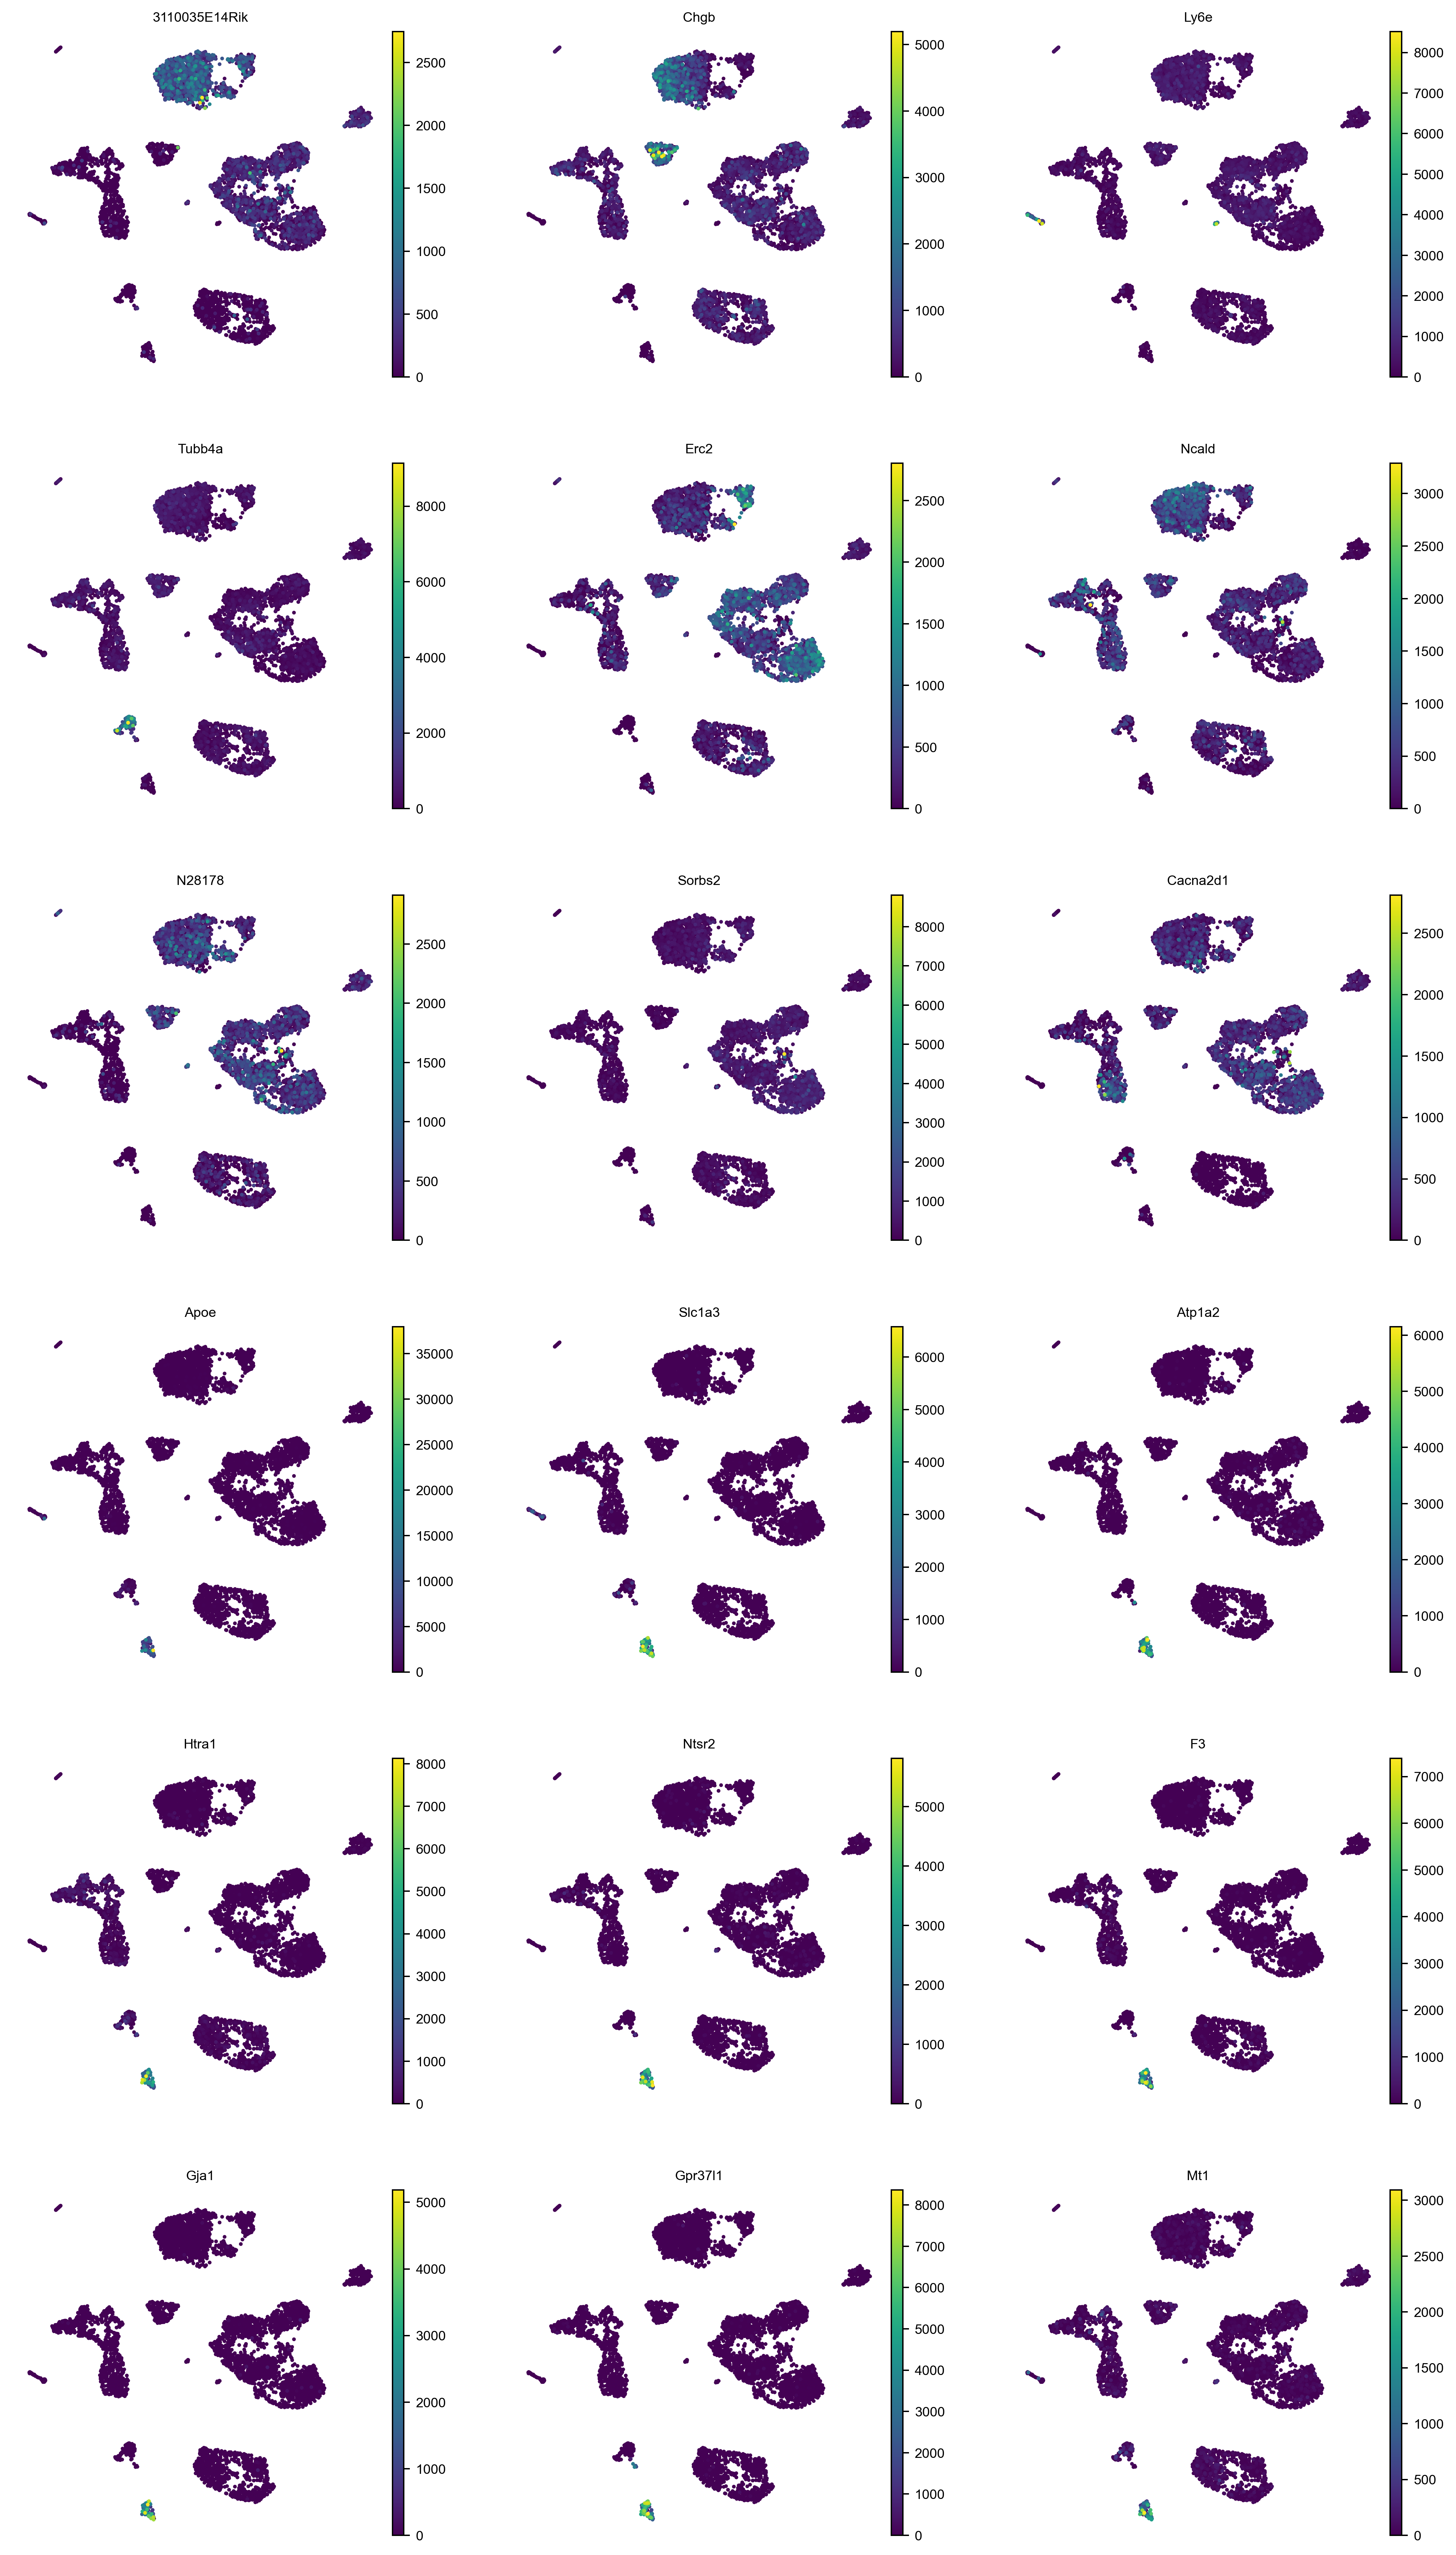

In [20]:
# if quick checking the marker gene expression distribution ( 3 each gene for both up and down regulated and control)
_check_markers=True
if _check_markers:
    sel_gene_list_plot=[]
    for _gene in sel_gene_list_dict['upregulated'][:9]:
        sel_gene_list_plot.append(_gene)
    for _gene in sel_gene_list_dict['downregulated'][:9]:
        sel_gene_list_plot.append(_gene)
    if add_control:
        for _gene in sel_gene_list_dict['control'][-3:]:
            sel_gene_list_plot.append(_gene)    
        
    #_filtered_gene_list = [_g for _g in sel_gene_list_plot if _g in adata.var.index]
    sc.pl.umap(adata, color=sel_gene_list_plot,ncols=3,legend_loc='on data')

## 3.2 Find markers using raw data

In [122]:
# Perform marker gene analysis (using the class label direclty, independent of the UMAP visualization)

class_list = ['Gluta','Astro']
groupby_type='class_label_new'



#class_list = ['Neuronal','Non-Neuronal']
#groupby_type='neuron_identity'


both_way=True
add_control=False
test_method='wilcoxon'
#test_method='t-test'
#test_method='logreg'

if test_method=='wilcoxon':
    tie_correct=True
else:
    tie_correct=False

tie_correct=False    
    
sel_gene_list_dict={}
use_raw=True
n_genes=100

class1=class_list[0]
class2=class_list[1]
sc.tl.rank_genes_groups(adata,groupby=groupby_type, groups=[class1],method=test_method,
                        reference=class2,  # or 'rest' as default
                        tie_correct=tie_correct,
                        use_raw=use_raw,
                         pts=True)

all_compared_gene_list=[]
all_compared_score_list=[]
for _gene, _score in zip(adata.uns['rank_genes_groups']['names'],adata.uns['rank_genes_groups']['scores']):
    all_compared_gene_list.append(_gene[0])
    all_compared_score_list.append(_score[0])
    
if both_way:
    # get the first 100 up-regulated genes
    sel_gene_list_dict['upregulated'] =all_compared_gene_list[:n_genes]
    #sel_gene_list_dict['upregulated'] =np.intersect1d(sel_gene_list_dict['upregulated'], linc_genes)
    # get the last 100 for down-regulated genes and sort them reversely
    down_gene_list = all_compared_gene_list[-n_genes:]
    down_gene_list.reverse()
    sel_gene_list_dict['downregulated'] =down_gene_list
    #sel_gene_list_dict['downregulated'] =np.intersect1d(sel_gene_list_dict['downregulated'], linc_genes)
        
if add_control:
    for _gene, _score in zip(all_compared_gene_list,all_compared_score_list):
        if abs(_score)==0:
            control_gene_list.append(_gene)
    control_size = np.min((300, len(control_gene_list)))
    print (f'{len(control_gene_list)} Control genes with z-score close to 0 added.')
    # pick 150 from above randomly
    print (f'Pick {control_size} control genes randomly from all candidates.')
    sel_gene_list_dict['control']= np.random.choice(control_gene_list,control_size)
    


_final_class_list = class_list

C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [22]:
# from transformed
adata.uns['rank_genes_groups']['pts']


Gluta     Astro
0610005C13Rik  0.011279  0.096774
0610007P14Rik  0.453084  0.225806
0610009B22Rik  0.300936  0.150538
0610009E02Rik  0.123350  0.010753
0610009L18Rik  0.050156  0.053763
...                 ...       ...
Zyx            0.261339  0.043011
Zzef1          0.422126  0.182796
Zzz3           0.392369  0.086022
a              0.002880  0.000000
l7Rn6          0.331653  0.129032

[33152 rows x 2 columns]

In [123]:
# from raw

adata.uns['rank_genes_groups']['logfoldchanges']

rec.array([( inf,), ( inf,), ( inf,), ..., (-inf,), (-inf,), (-inf,)],
          dtype=[('Gluta', '<f4')])

In [124]:
adata.uns['rank_genes_groups']['pvals'][-100:]

rec.array([(8.77367484e-23,), (7.68489575e-23,), (1.38145248e-23,),
           (1.00818415e-23,), (7.36662361e-24,), (4.17413094e-24,),
           (1.68106427e-24,), (9.84617389e-25,), (9.42062365e-25,),
           (9.06925998e-25,), (8.04480003e-25,), (7.95980277e-25,),
           (3.94486644e-25,), (2.45772902e-25,), (6.35319270e-26,),
           (1.98357097e-26,), (1.02095485e-26,), (9.94074147e-27,),
           (7.32777359e-27,), (7.32439424e-27,), (6.55344056e-27,),
           (3.10033718e-27,), (1.76802667e-27,), (1.58277956e-27,),
           (9.92027212e-28,), (5.03718431e-28,), (5.00639476e-28,),
           (3.30190219e-28,), (1.93943860e-28,), (3.41746336e-29,),
           (4.45052625e-30,), (3.75322099e-30,), (1.28675363e-30,),
           (9.28434811e-31,), (9.07527032e-31,), (7.77926567e-31,),
           (4.37181226e-31,), (2.39161067e-31,), (2.15084764e-32,),
           (5.44502468e-33,), (7.39057733e-34,), (6.78929046e-34,),
           (9.39584466e-35,), (3.16379748e-35,),

In [125]:
adata.uns['rank_genes_groups']['scores'][-100:]

rec.array([( -9.825157 ,), ( -9.838499 ,), (-10.009718 ,), (-10.040833 ,),
           (-10.071736 ,), (-10.127445 ,), (-10.216018 ,), (-10.267762 ,),
           (-10.272025 ,), (-10.27569  ,), (-10.287242 ,), (-10.288264 ,),
           (-10.355653 ,), (-10.400834 ,), (-10.528961 ,), (-10.637993 ,),
           (-10.699712 ,), (-10.702184 ,), (-10.730401 ,), (-10.730443 ,),
           (-10.740716 ,), (-10.809596 ,), (-10.861    ,), (-10.871101 ,),
           (-10.91364  ,), (-10.975061 ,), (-10.9756155,), (-11.013166 ,),
           (-11.06099  ,), (-11.21563  ,), (-11.394564 ,), (-11.409397 ,),
           (-11.502147 ,), (-11.530278 ,), (-11.532239 ,), (-11.545495 ,),
           (-11.594938 ,), (-11.64647  ,), (-11.850041 ,), (-11.964614 ,),
           (-12.12927  ,), (-12.136217 ,), (-12.297036 ,), (-12.384671 ,),
           (-12.390511 ,), (-12.3949   ,), (-12.514119 ,), (-12.712447 ,),
           (-12.80021  ,), (-12.954849 ,), (-12.975393 ,), (-13.004037 ,),
           (-13.014692 ,)

In [113]:

adata.uns['rank_genes_groups']['logfoldchanges']

rec.array([(       inf,), (       inf,), (       inf,), ...,
           (-305.73886,), (      -inf,), (-100.00318,)],
          dtype=[('Gluta', '<f4')])

In [121]:
adata.uns['rank_genes_groups']['pvals'][-100:]


rec.array([(3.75644684e-178,), (3.12927385e-178,), (2.86331595e-178,),
           (2.35305334e-178,), (7.29973553e-179,), (1.24506988e-182,),
           (3.99258402e-183,), (6.20406269e-185,), (3.65358613e-188,),
           (4.82272979e-189,), (6.30515545e-193,), (1.54467891e-193,),
           (1.81248192e-195,), (4.40038019e-196,), (7.40227286e-198,),
           (6.36175238e-201,), (6.84710159e-202,), (9.14251236e-203,),
           (2.96965325e-203,), (1.00426347e-204,), (3.51642966e-210,),
           (2.13648136e-211,), (8.19413868e-214,), (5.62084390e-214,),
           (4.59006559e-214,), (2.96643874e-221,), (5.17603724e-224,),
           (1.50829669e-224,), (6.36414373e-226,), (1.42169291e-227,),
           (9.22329027e-235,), (1.11235974e-237,), (1.45236472e-238,),
           (1.03797238e-239,), (6.24763609e-246,), (1.61460782e-246,),
           (9.50708107e-247,), (1.17050857e-252,), (3.38331751e-261,),
           (1.40126278e-261,), (1.62222662e-262,), (3.53580352e-264,),
      

In [120]:
adata.uns['rank_genes_groups']['scores'][-100:]

rec.array([(-28.459135,), (-28.465546,), (-28.468662,), (-28.475546,),
           (-28.516571,), (-28.818857,), (-28.858248,), (-29.002024,),
           (-29.25704 ,), (-29.326092,), (-29.629103,), (-29.676483,),
           (-29.825731,), (-29.873102,), (-30.009386,), (-30.24345 ,),
           (-30.316984,), (-30.383255,), (-30.420202,), (-30.531214,),
           (-30.939507,), (-31.029808,), (-31.208406,), (-31.220469,),
           (-31.22695 ,), (-31.75214 ,), (-31.95134 ,), (-31.98987 ,),
           (-32.088573,), (-32.206707,), (-32.716087,), (-32.920673,),
           (-32.9824  ,), (-33.06223 ,), (-33.49226 ,), (-33.5326  ,),
           (-33.548378,), (-33.951214,), (-34.524994,), (-34.55049 ,),
           (-34.61279 ,), (-34.72306 ,), (-34.742992,), (-35.169704,),
           (-35.47081 ,), (-35.83584 ,), (-35.846962,), (-36.00186 ,),
           (-36.14685 ,), (-36.53017 ,), (-36.66735 ,), (-36.68689 ,),
           (-37.185925,), (-37.62927 ,), (-37.73607 ,), (-37.781487,),
      

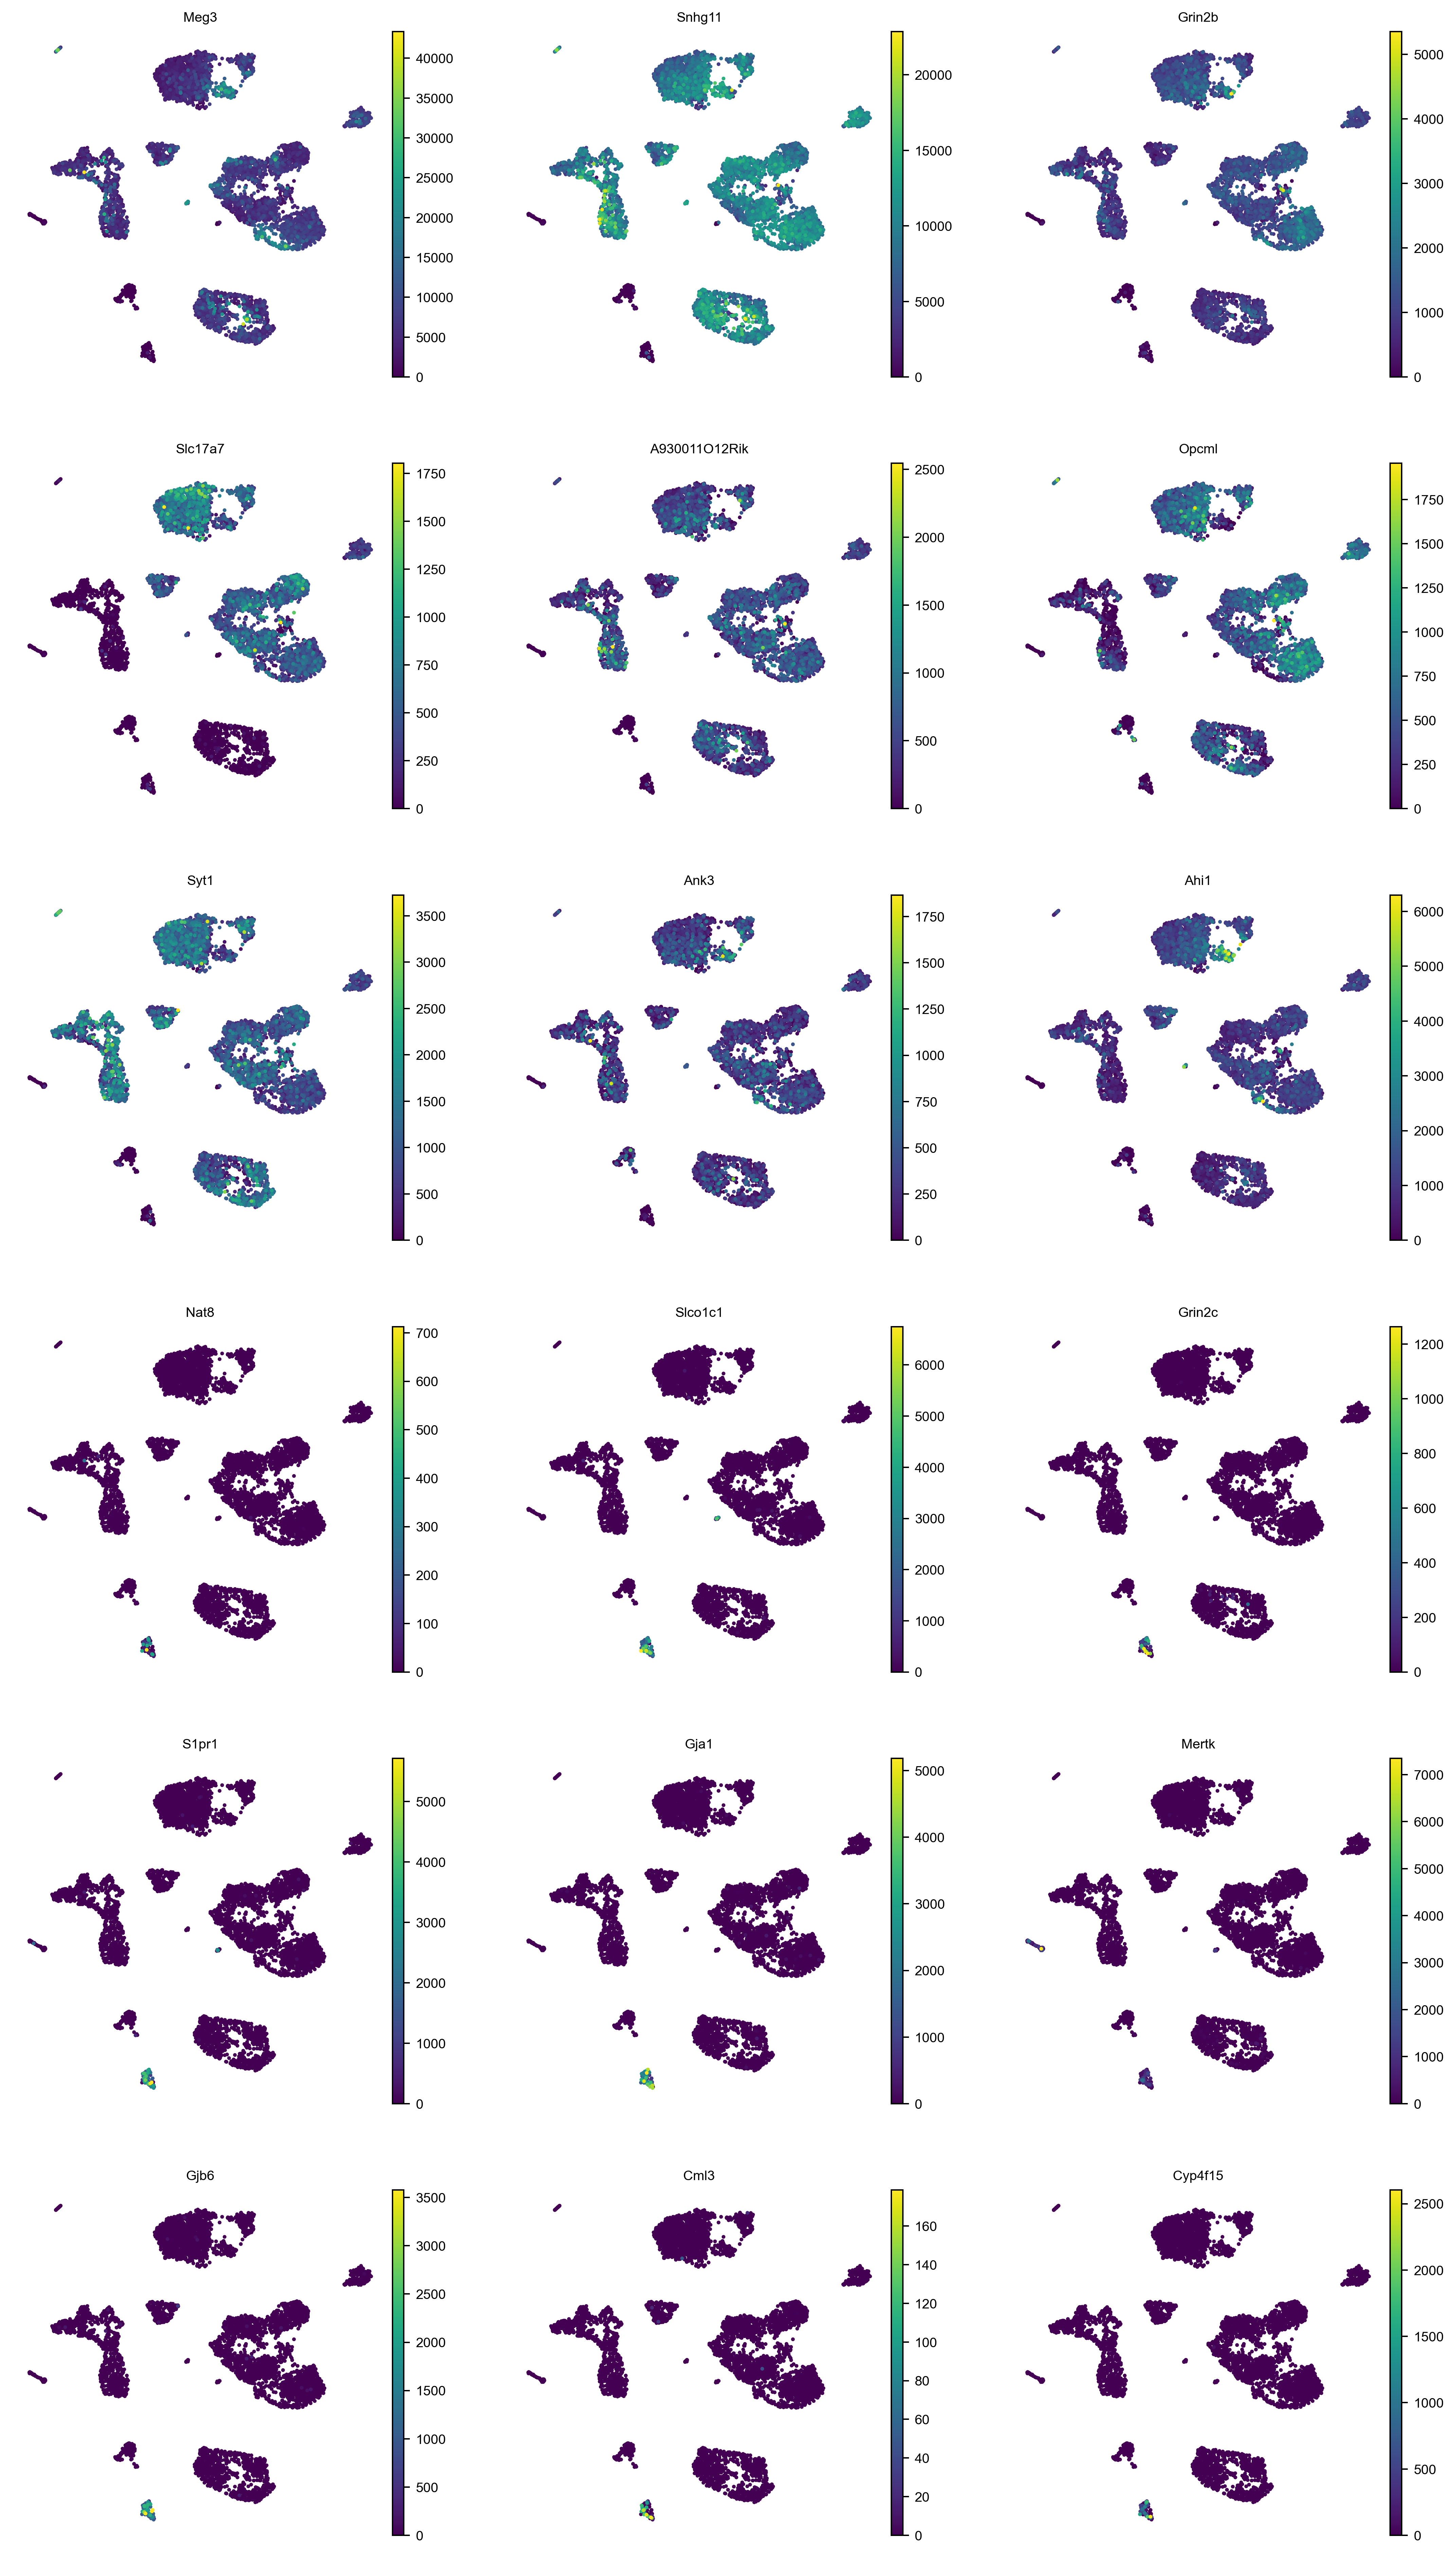

In [114]:
# if quick checking the marker gene expression distribution ( 3 each gene for both up and down regulated and control)
_check_markers=True
if _check_markers:
    sel_gene_list_plot=[]
    for _gene in sel_gene_list_dict['upregulated'][:9]:
        sel_gene_list_plot.append(_gene)
    for _gene in sel_gene_list_dict['downregulated'][:9]:
        sel_gene_list_plot.append(_gene)
    if add_control:
        for _gene in sel_gene_list_dict['control'][-3:]:
            sel_gene_list_plot.append(_gene)    
        
    #_filtered_gene_list = [_g for _g in sel_gene_list_plot if _g in adata.var.index]
    sc.pl.umap(adata, color=sel_gene_list_plot,ncols=3,legend_loc='on data')

In [16]:
adata_ori=adata.raw.to_adata()

print('Slc17a7' in adata.var.index)

print('Slc17a7' in adata_ori.var.index)

False
True


## 3.3 Filter markers (using raw data)

In [61]:
adata.uns['rank_genes_groups']['logfoldchanges'][-200:-190]

rec.array([(  -7.5588226,), (-307.94165  ,), ( -32.444122 ,),
           ( -62.846992 ,), (-135.69394  ,), ( -25.888437 ,),
           (-126.3032   ,), ( -29.345743 ,), ( -51.349236 ,),
           ( -55.03258  ,)],
          dtype=[('Gluta', '<f4')])

In [90]:
# Perform marker gene analysis (using the class label direclty, independent of the UMAP visualization)

class_list = ['Gluta','Astro']
groupby_type='class_label_new'



#class_list = ['Neuronal','Non-Neuronal']
#groupby_type='neuron_identity'


both_way=True
add_control=False
test_method='wilcoxon'
#test_method='t-test'
#test_method='logreg'

sel_gene_list_dict={}
use_raw=True
n_genes=100

class1=class_list[0]
class2=class_list[1]
sc.tl.filter_rank_genes_groups(adata,groupby=groupby_type, 
                        min_in_group_fraction=0.001,
                        min_fold_change=0,
                        #compare_abs=False, # abs of fold change so downregulated can also be kept
                        key_added='rank_genes_groups_filtered',
                        use_raw=use_raw,
                        )




C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:793: RuntimeWarning: overflow encountered in expm1
  (expm1_func(mean_in_cluster) + 1e-9)
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:794: RuntimeWarning: overflow encountered in expm1
  / (expm1_func(mean_out_cluster) + 1e-9)
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:793: RuntimeWarning: invalid value encountered in true_divide
  (expm1_func(mean_in_cluster) + 1e-9)
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:792: RuntimeWarning: divide by zero encountered in log2
  fold_change_matrix.loc[:, cluster] = np.log2(


In [66]:
#adata.uns['rank_genes_groups_filtered']

### 3.3.1 Check downregulated genes

In [91]:
_gene_list=adata.uns['rank_genes_groups']['names'][-200:-190]
_gene_list=[_g[0] for _g in _gene_list]
adata.uns['rank_genes_groups']['pts'].loc[_gene_list]

Gluta     Astro
Mir92b         0.002160  0.161290
Cml1           0.082793  0.677419
5930403L14Rik  0.000480  0.118280
Il15           0.000480  0.118280
Npas3          0.053516  0.559140
Tst            0.005760  0.225806
Adhfe1         0.009119  0.268817
LOC105245834   0.006479  0.236559
Aass           0.000720  0.129032
Egfr           0.000720  0.129032

In [92]:
adata.uns['rank_genes_groups']['names'][-200:-190]

rec.array([('Mir92b',), ('Cml1',), ('5930403L14Rik',), ('Il15',),
           ('Npas3',), ('Tst',), ('Adhfe1',), ('LOC105245834',),
           ('Aass',), ('Egfr',)],
          dtype=[('Gluta', 'O')])

In [93]:
adata.uns['rank_genes_groups_filtered']['names'][-200:-190]

rec.array([(nan,), (nan,), (nan,), (nan,), (nan,), (nan,), (nan,), (nan,),
           (nan,), (nan,)],
          dtype=[('Gluta', 'O')])

In [94]:
adata.uns['rank_genes_groups']['logfoldchanges'][-200:-190]

rec.array([(  -7.5588226,), (-307.94165  ,), ( -32.444122 ,),
           ( -62.846992 ,), (-135.69394  ,), ( -25.888437 ,),
           (-126.3032   ,), ( -29.345743 ,), ( -51.349236 ,),
           ( -55.03258  ,)],
          dtype=[('Gluta', '<f4')])

### 3.3.2 Check upregulated genes

In [96]:
_gene_list=adata.uns['rank_genes_groups']['names'][:10]
_gene_list=[_g[0] for _g in _gene_list]
adata.uns['rank_genes_groups']['pts'].loc[_gene_list]

Gluta     Astro
Meg3           1.000000  0.666667
Snhg11         1.000000  0.967742
Grin2b         0.998800  0.591398
Slc17a7        0.993041  0.215054
A930011O12Rik  0.989201  0.086022
Opcml          0.980562  0.182796
Syt1           0.997840  0.225806
Ank3           0.991841  0.118280
Ahi1           0.997360  0.344086
Trank1         0.970962  0.139785

In [97]:
adata.uns['rank_genes_groups']['names'][:10]

rec.array([('Meg3',), ('Snhg11',), ('Grin2b',), ('Slc17a7',),
           ('A930011O12Rik',), ('Opcml',), ('Syt1',), ('Ank3',),
           ('Ahi1',), ('Trank1',)],
          dtype=[('Gluta', 'O')])

In [98]:
adata.uns['rank_genes_groups_filtered']['names'][:10]

rec.array([(nan,), (nan,), (nan,), ('Slc17a7',), (nan,), (nan,), (nan,),
           (nan,), (nan,), (nan,)],
          dtype=[('Gluta', 'O')])

In [99]:
adata.uns['rank_genes_groups_filtered']['logfoldchanges'][:10]

rec.array([(      inf,), (      inf,), (      inf,), (568.15436,),
           (514.4588 ,), (605.6181 ,), (      inf,), (286.34848,),
           (      inf,), (465.97217,)],
          dtype=[('Gluta', '<f4')])

In [85]:
#adata.uns['rank_genes_groups_filtered']['logfoldchanges'][0][0]>10

In [100]:
adata.uns['rank_genes_groups']['logfoldchanges'][:10]

rec.array([(      inf,), (      inf,), (      inf,), (568.15436,),
           (514.4588 ,), (605.6181 ,), (      inf,), (286.34848,),
           (      inf,), (465.97217,)],
          dtype=[('Gluta', '<f4')])

### 3.3.3 Conclusions

# 4. Check DE analysis statisitcs

## 4.1 Use all genes

In [ ]:
# re-perform the analysis to make sure desired param were not changed above


In [127]:
# Perform marker gene analysis (using the class label direclty, independent of the UMAP visualization)

class_list = ['Gluta','Astro']
groupby_type='class_label_new'



#class_list = ['Neuronal','Non-Neuronal']
#groupby_type='neuron_identity'


both_way=True
add_control=False
test_method='wilcoxon'
#test_method='t-test'
#test_method='logreg'

if test_method=='wilcoxon':
    tie_correct=True
else:
    tie_correct=False

tie_correct=False

sel_gene_list_dict={}
use_raw=True
n_genes=100

class1=class_list[0]
class2=class_list[1]
sc.tl.rank_genes_groups(adata,groupby=groupby_type, groups=[class1],method=test_method,
                        reference=class2,  # or 'rest' as default
                        tie_correct=tie_correct,
                        use_raw=use_raw,
                         pts=True)


C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


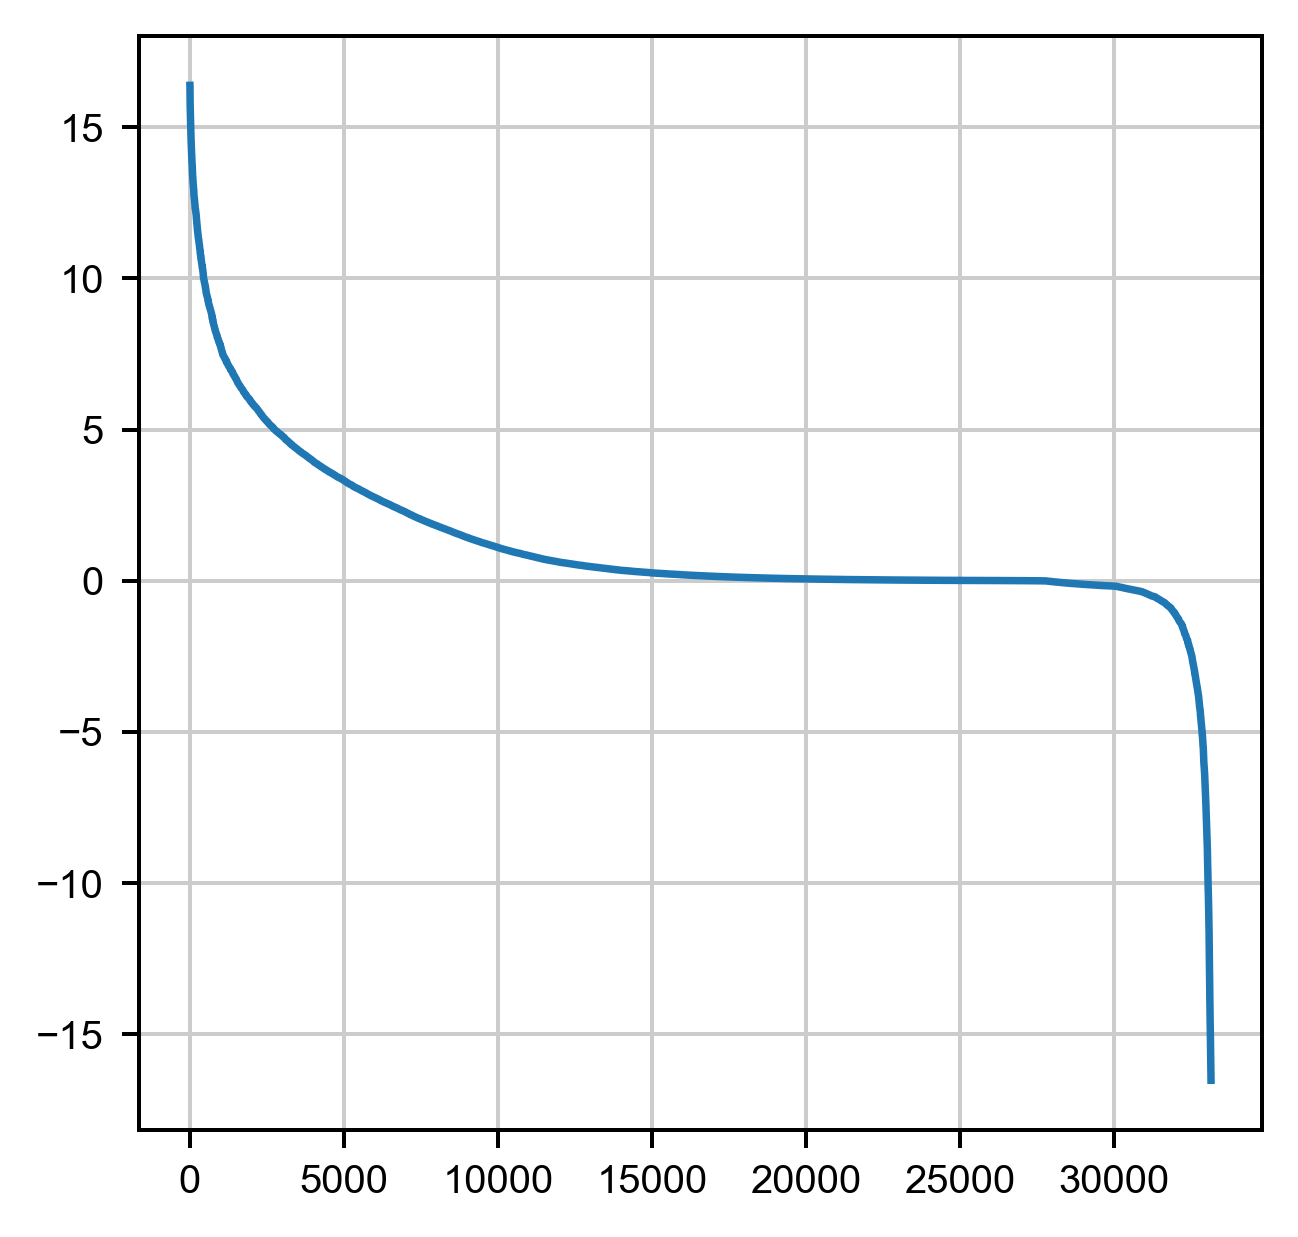

In [128]:
all_compared_score_list=adata.uns['rank_genes_groups']['scores']
plt.plot(all_compared_score_list)

In [129]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'class_label_new',
  'reference': 'Astro',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'pts':                   Gluta     Astro
 0610005C13Rik  0.011279  0.096774
 0610007P14Rik  0.453084  0.225806
 0610009B22Rik  0.300936  0.150538
 0610009E02Rik  0.123350  0.010753
 0610009L18Rik  0.050156  0.053763
 ...                 ...       ...
 Zyx            0.261339  0.043011
 Zzef1          0.422126  0.182796
 Zzz3           0.392369  0.086022
 a              0.002880  0.000000
 l7Rn6          0.331653  0.129032
 
 [33152 rows x 2 columns],
 'names': rec.array([('Meg3',), ('Snhg11',), ('Grin2b',), ..., ('Atp1a2',),
            ('Slc1a3',), ('Apoe',)],
           dtype=[('Gluta', 'O')]),
 'scores': rec.array([( 16.384611,), ( 16.357588,), ( 16.143957,), ...,
            (-16.511204,), (-16.51325 ,), (-16.51632 ,)],
           dtype=[('Gluta', '<f4')]),
 'pvals': rec.array([(2.46338385e-60,), (3.84040656e-60,), (1

In [130]:
#adata.uns['rank_genes_groups']['pvals']

In [131]:
# get zscore from pvals (note the calculated value is one sided here)

import scipy.stats as st

# check for the top #1 gene Meg3 and bottom #1 gene Nat8
# pval
print(st.norm.ppf(2.46338385e-60))

print(st.norm.ppf(2.79973602e-61))

# small difference between the reported zscore and the zscore calculated from the reported P-val

-16.342408497992007
-16.474450831535364


In [133]:
import scipy.stats as st
# check for the top #1 gene Meg3 and bottom #1 gene Nat8
# pval_adj
print(st.norm.ppf(1.63332203e-56))
print(st.norm.ppf(3.36761140e-57))

-15.796925485303952
-15.896176296764576


In [142]:
pvals = 2 * stats.distributions.norm.sf(np.abs(-16.51632))
pvals


st.norm.ppf(pvals)

-16.474452089729244

In [134]:
# try collect all pval to check
from scipy import stats
pvals_list = adata.uns['rank_genes_groups']['pvals_adj']
pvals_list = [_p[0] for _p in pvals_list]
stats.zscore(pvals_list)

array([-1.65177273, -1.65177273, -1.65177273, ..., -1.65177273,
       -1.65177273, -1.65177273])

## 4.2 Use first 100 genes

In [135]:
# Perform marker gene analysis (using the class label direclty, independent of the UMAP visualization)

class_list = ['Gluta','Astro']
groupby_type='class_label_new'



#class_list = ['Neuronal','Non-Neuronal']
#groupby_type='neuron_identity'


both_way=True
add_control=False
test_method='wilcoxon'
#test_method='t-test'
#test_method='logreg'

if test_method=='wilcoxon':
    tie_correct=True
else:
    tie_correct=False

tie_correct=False

sel_gene_list_dict={}
use_raw=True
n_genes=100

class1=class_list[0]
class2=class_list[1]
sc.tl.rank_genes_groups(adata,groupby=groupby_type, groups=[class1],method=test_method,
                        reference=class2,  # or 'rest' as default
                        tie_correct=tie_correct,
                        use_raw=use_raw,n_genes=100,
                         pts=True)


C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\shiwei\Anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


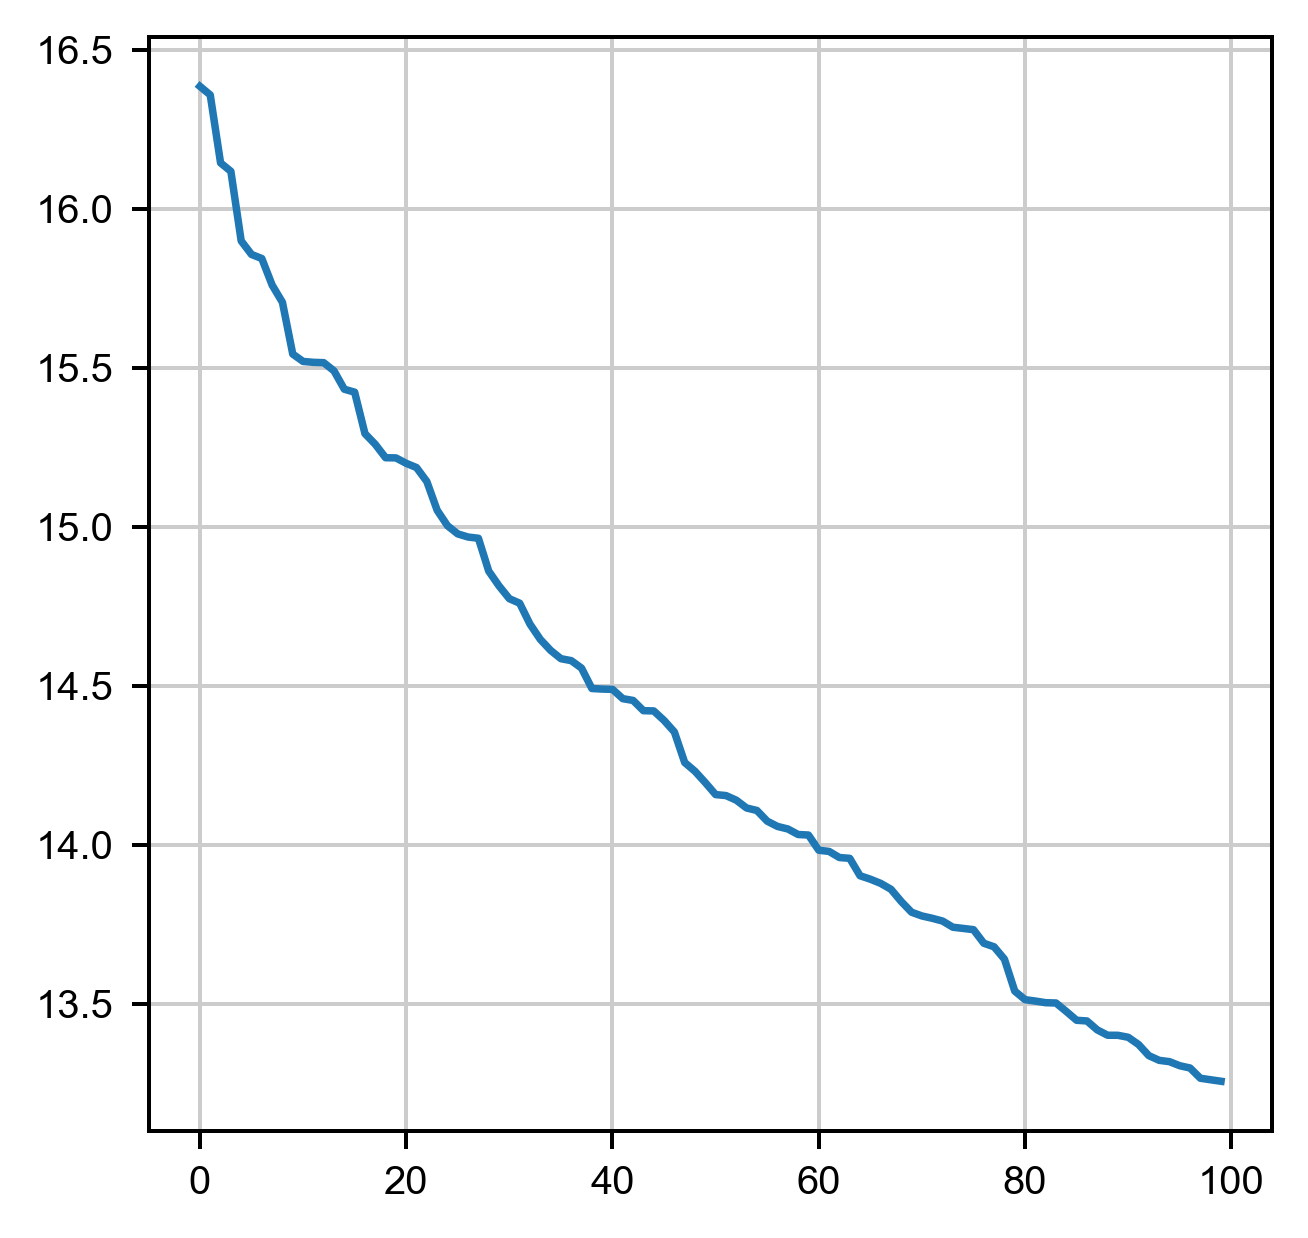

In [136]:
all_compared_score_list=adata.uns['rank_genes_groups']['scores']
plt.plot(all_compared_score_list)

In [139]:
adata.uns['rank_genes_groups']['pvals'][:10]

rec.array([(2.46338385e-60,), (3.84040656e-60,), (1.25246375e-58,),
           (1.92531597e-58,), (6.47366965e-57,), (1.27621058e-56,),
           (1.56631149e-56,), (5.88679742e-56,), (1.38894592e-55,),
           (1.78290268e-54,)],
          dtype=[('Gluta', '<f8')])

## 4.3 Conclusions